<a href="https://colab.research.google.com/github/cazathoth/tfm/blob/main/tfm_jvasquez_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#descarga librerias.
install.packages("tidyverse")
install.packages("arrow")
install.packages("lubridate")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#cargo librerias a utilizar.
library("tidyverse")
library("arrow")
library("lubridate")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp




In [3]:
#creo directorio y descargo dataset con datos de urgencias respiratorias
dir.create("descargas")
url <- "https://datos.gob.cl/dataset/606ef5bb-11d1-475b-b69f-b980da5757f4/resource/ae6c9887-106d-4e98-8875-40bf2b836041/download/at_urg_respiratorio_semanal.parquet"
nombre_temporal <- "descargas/at_urg_respiratorio_semanal.parquet"
download.file(url, nombre_temporal)

In [61]:
df_urgr_esp_semanal <- read_parquet("descargas/at_urg_respiratorio_semanal.parquet", col_select = c ('EstablecimientoCodigo','RegionCodigo', 'RegionGlosa','ComunaCodigo','ComunaGlosa', 'Anio', 'SemanaEstadistica','OrdenCausa','Causa','NumTotal'))

In [62]:
count(df_urgr_esp_semanal)
head(df_urgr_esp_semanal,5)


n
<int>
2809119


EstablecimientoCodigo,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
122101,14,Región De Los Ríos,14102,Corral,2014,16,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,53
113818,13,Región Metropolitana de Santiago,13404,Paine,2019,12,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,259
114825,13,Región Metropolitana de Santiago,13111,La Granja,2020,35,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,20
200118,13,Región Metropolitana de Santiago,13103,Cerro Navia,2023,29,5,Influenza (J09-J11),0
123100,10,Región De Los Lagos,10301,Osorno,2017,22,6,Neumonía (J12-J18),66


In [63]:
sum(is.na(df_urgr_esp_semanal))
sum(!complete.cases(df_urgr_esp_semanal))

[1] 11280

[1] 2256

In [64]:
df_urgr_esp_semanal <- na.omit(df_urgr_esp_semanal)
sum(is.na(df_urgr_esp_semanal))
sum(!complete.cases(df_urgr_esp_semanal))
count(df_urgr_esp_semanal)

[1] 0

[1] 0

n
<int>
2806863


In [65]:
df_urgr_esp_semanal %>% select(OrdenCausa, Causa)%>%distinct()%>%arrange(OrdenCausa)

OrdenCausa,Causa
<int>,<chr>
3,TOTAL CAUSAS SISTEMA RESPIRATORIO
4,IRA Alta (J00-J06)
5,Influenza (J09-J11)
6,Neumonía (J12-J18)
7,Bronquitis/bronquiolitis aguda (J20-J21)
8,Crisis obstructiva bronquial (J40-J46)
9,"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)"
10,"Covid-19, Virus no identificado U07.2"
11,"Covid-19, Virus identificado U07.1"


In [66]:
#df_urgr_esp_semanal<- df_urgr_esp_semanal %>% filter (RegionCodigo %in% c(8,4,13) & Anio == 2019 & SemanaEstadistica == 11 & OrdenCausa != 3)
df_urgr_esp_semanal<- df_urgr_esp_semanal %>% filter (RegionCodigo %in% c(8,4,13) & OrdenCausa != 3)
count(df_urgr_esp_semanal)
head(df_urgr_esp_semanal,5)

n
<int>
1081423


EstablecimientoCodigo,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
200118,13,Región Metropolitana de Santiago,13103,Cerro Navia,2023,29,5,Influenza (J09-J11),0
111804,13,Región Metropolitana de Santiago,13119,Maipú,2020,10,33,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2",0
105804,4,Región De Coquimbo,4102,Coquimbo,2014,36,4,IRA Alta (J00-J06),174
120103,8,Región Del Bíobío,8306,Nacimiento,2023,23,4,IRA Alta (J00-J06),64
113802,13,Región Metropolitana de Santiago,13130,San Miguel,2022,34,9,"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)",5


In [67]:
df_urgr_esp_semanal <- df_urgr_esp_semanal %>% group_by(RegionGlosa)
df_urgr_esp_semanal

EstablecimientoCodigo,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
200118,13,Región Metropolitana de Santiago,13103,Cerro Navia,2023,29,5,Influenza (J09-J11),0
111804,13,Región Metropolitana de Santiago,13119,Maipú,2020,10,33,"HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2",0
105804,4,Región De Coquimbo,4102,Coquimbo,2014,36,4,IRA Alta (J00-J06),174
120103,8,Región Del Bíobío,8306,Nacimiento,2023,23,4,IRA Alta (J00-J06),64
113802,13,Región Metropolitana de Santiago,13130,San Miguel,2022,34,9,"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)",5
200138,13,Región Metropolitana de Santiago,13124,Pudahuel,2024,13,9,"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)",21
105826,4,Región De Coquimbo,4101,La Serena,2022,43,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0
112814,13,Región Metropolitana de Santiago,13122,Peñalolén,2023,47,10,"Covid-19, Virus no identificado U07.2",1
128110,8,Región Del Bíobío,8201,Lebu,2016,19,9,"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)",1


In [81]:
df_resumen <- df_urgr_esp_semanal %>%
  group_by(Anio) %>%
  summarise(Total = sum(NumTotal, na.rm = TRUE))
  df_resumen

Anio,Total
<int>,<int>
2014,2781235
2015,2968041
2016,2900187
2017,2741817
2018,2669861
2019,2746776
2020,1199890
2021,1806094
2022,3578402


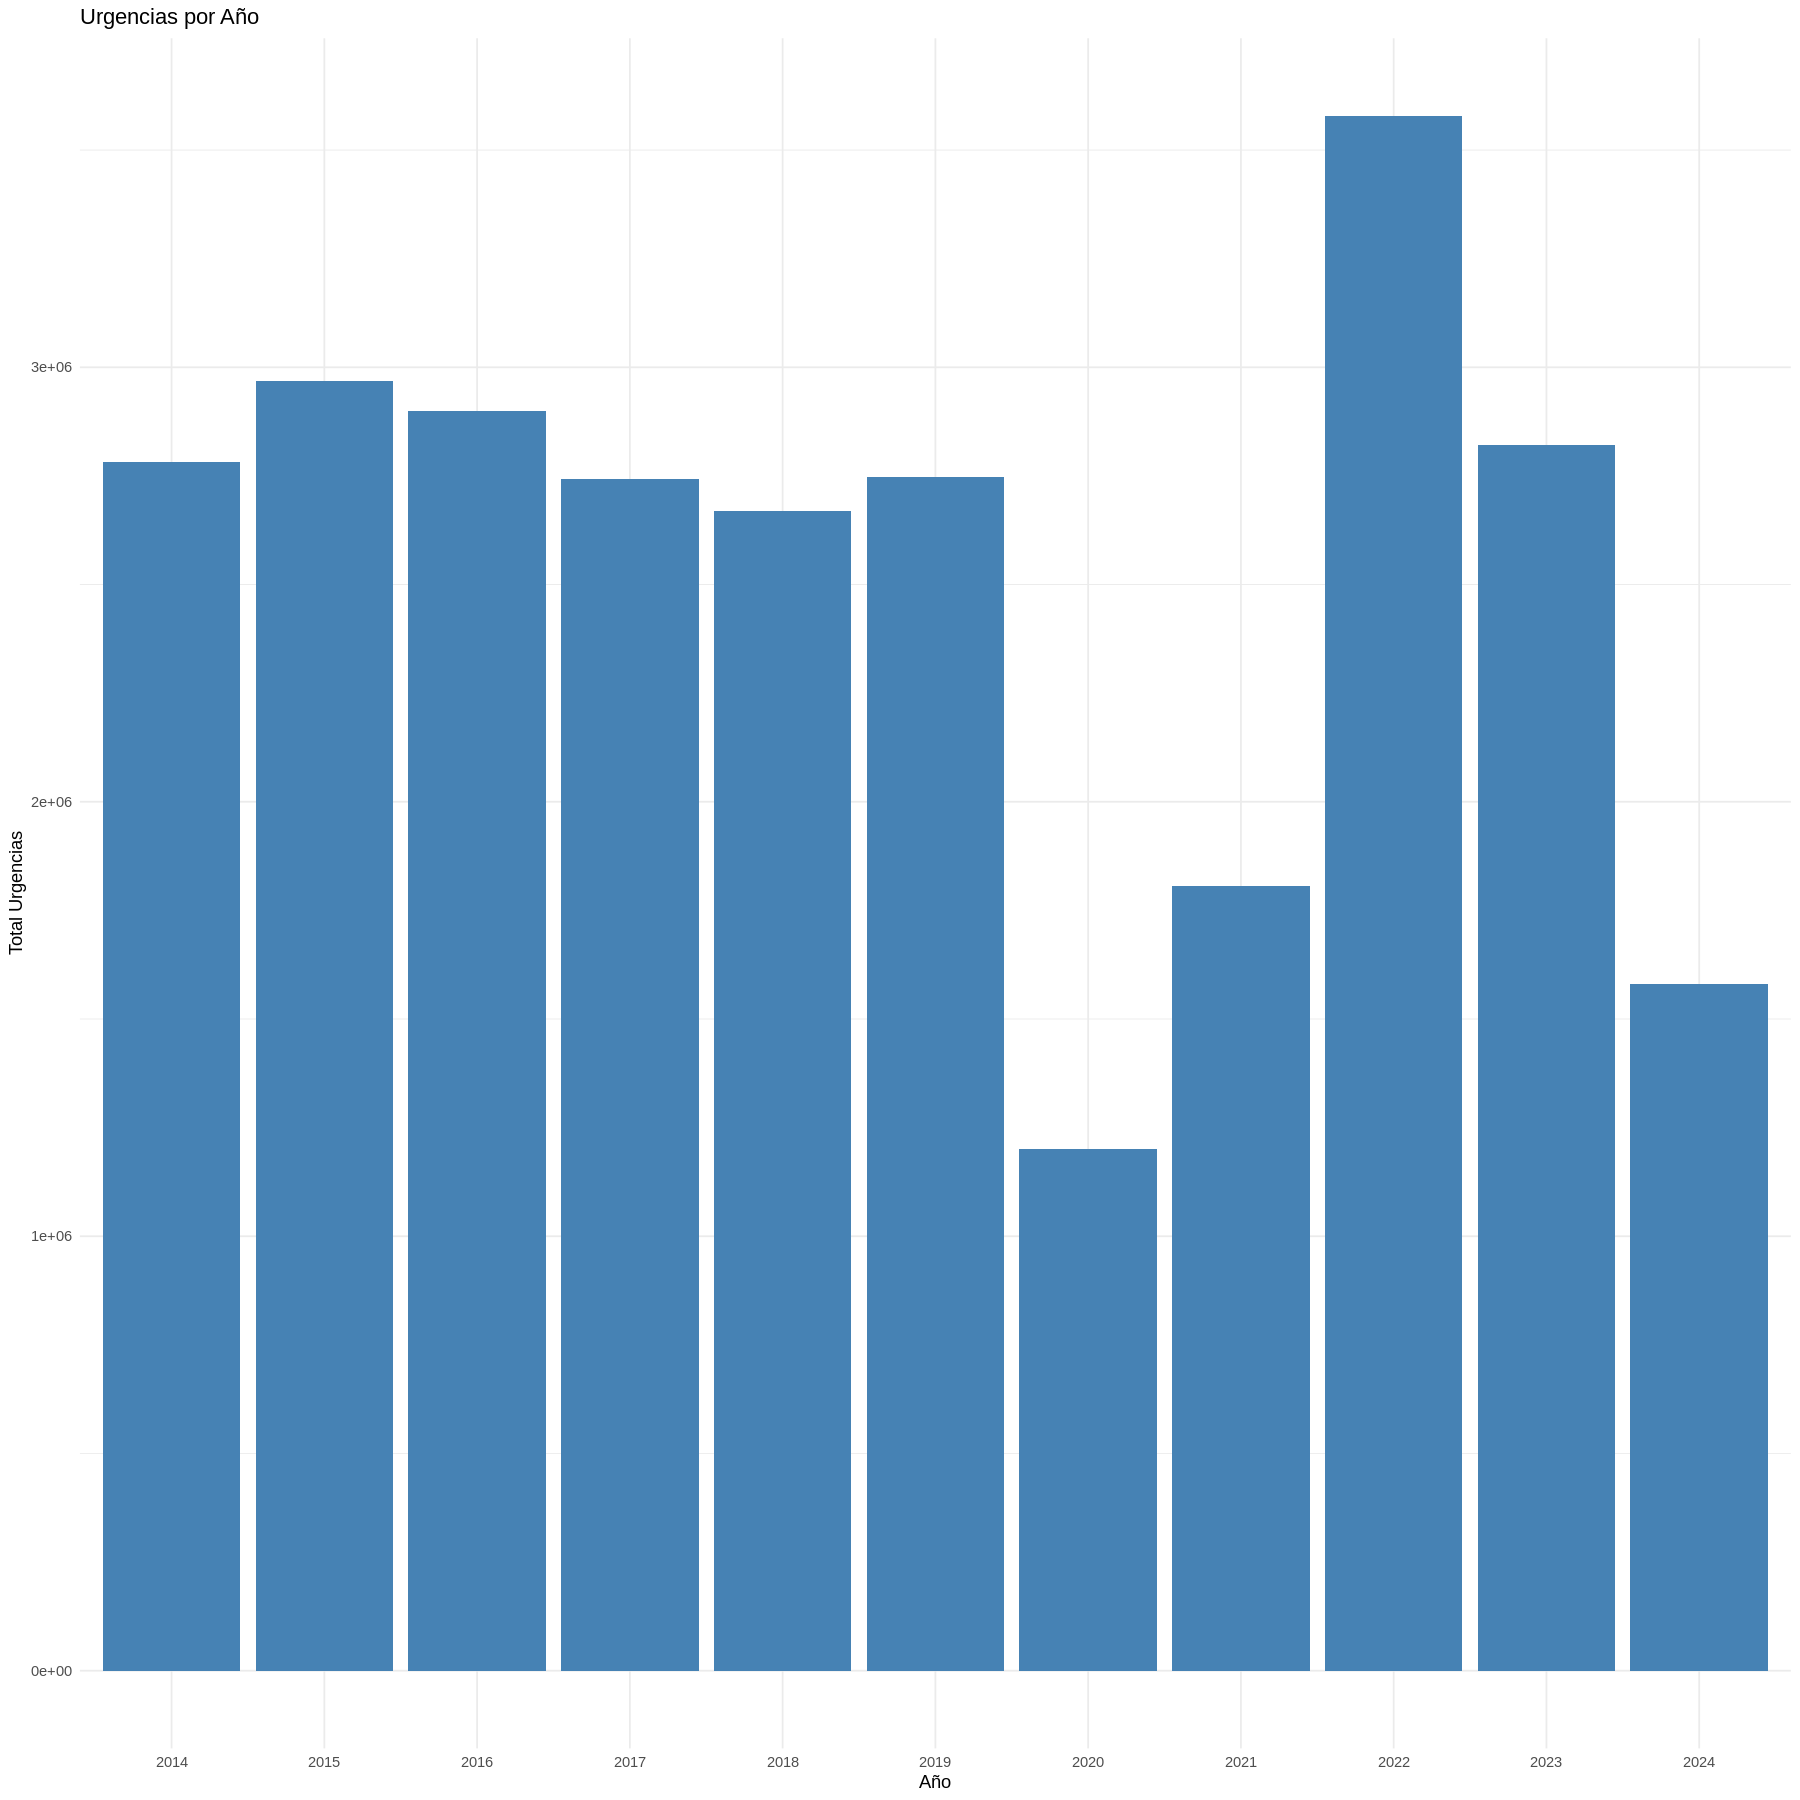

In [82]:
df_agrupado <- df_urgr_esp_semanal %>%
  group_by(Anio) %>%
  summarise(Total = sum(NumTotal, na.rm = TRUE))
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(df_agrupado, aes(x = factor(Anio), y = Total)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Año", y = "Total Urgencias", title = "Urgencias por Año") +
  theme_minimal()

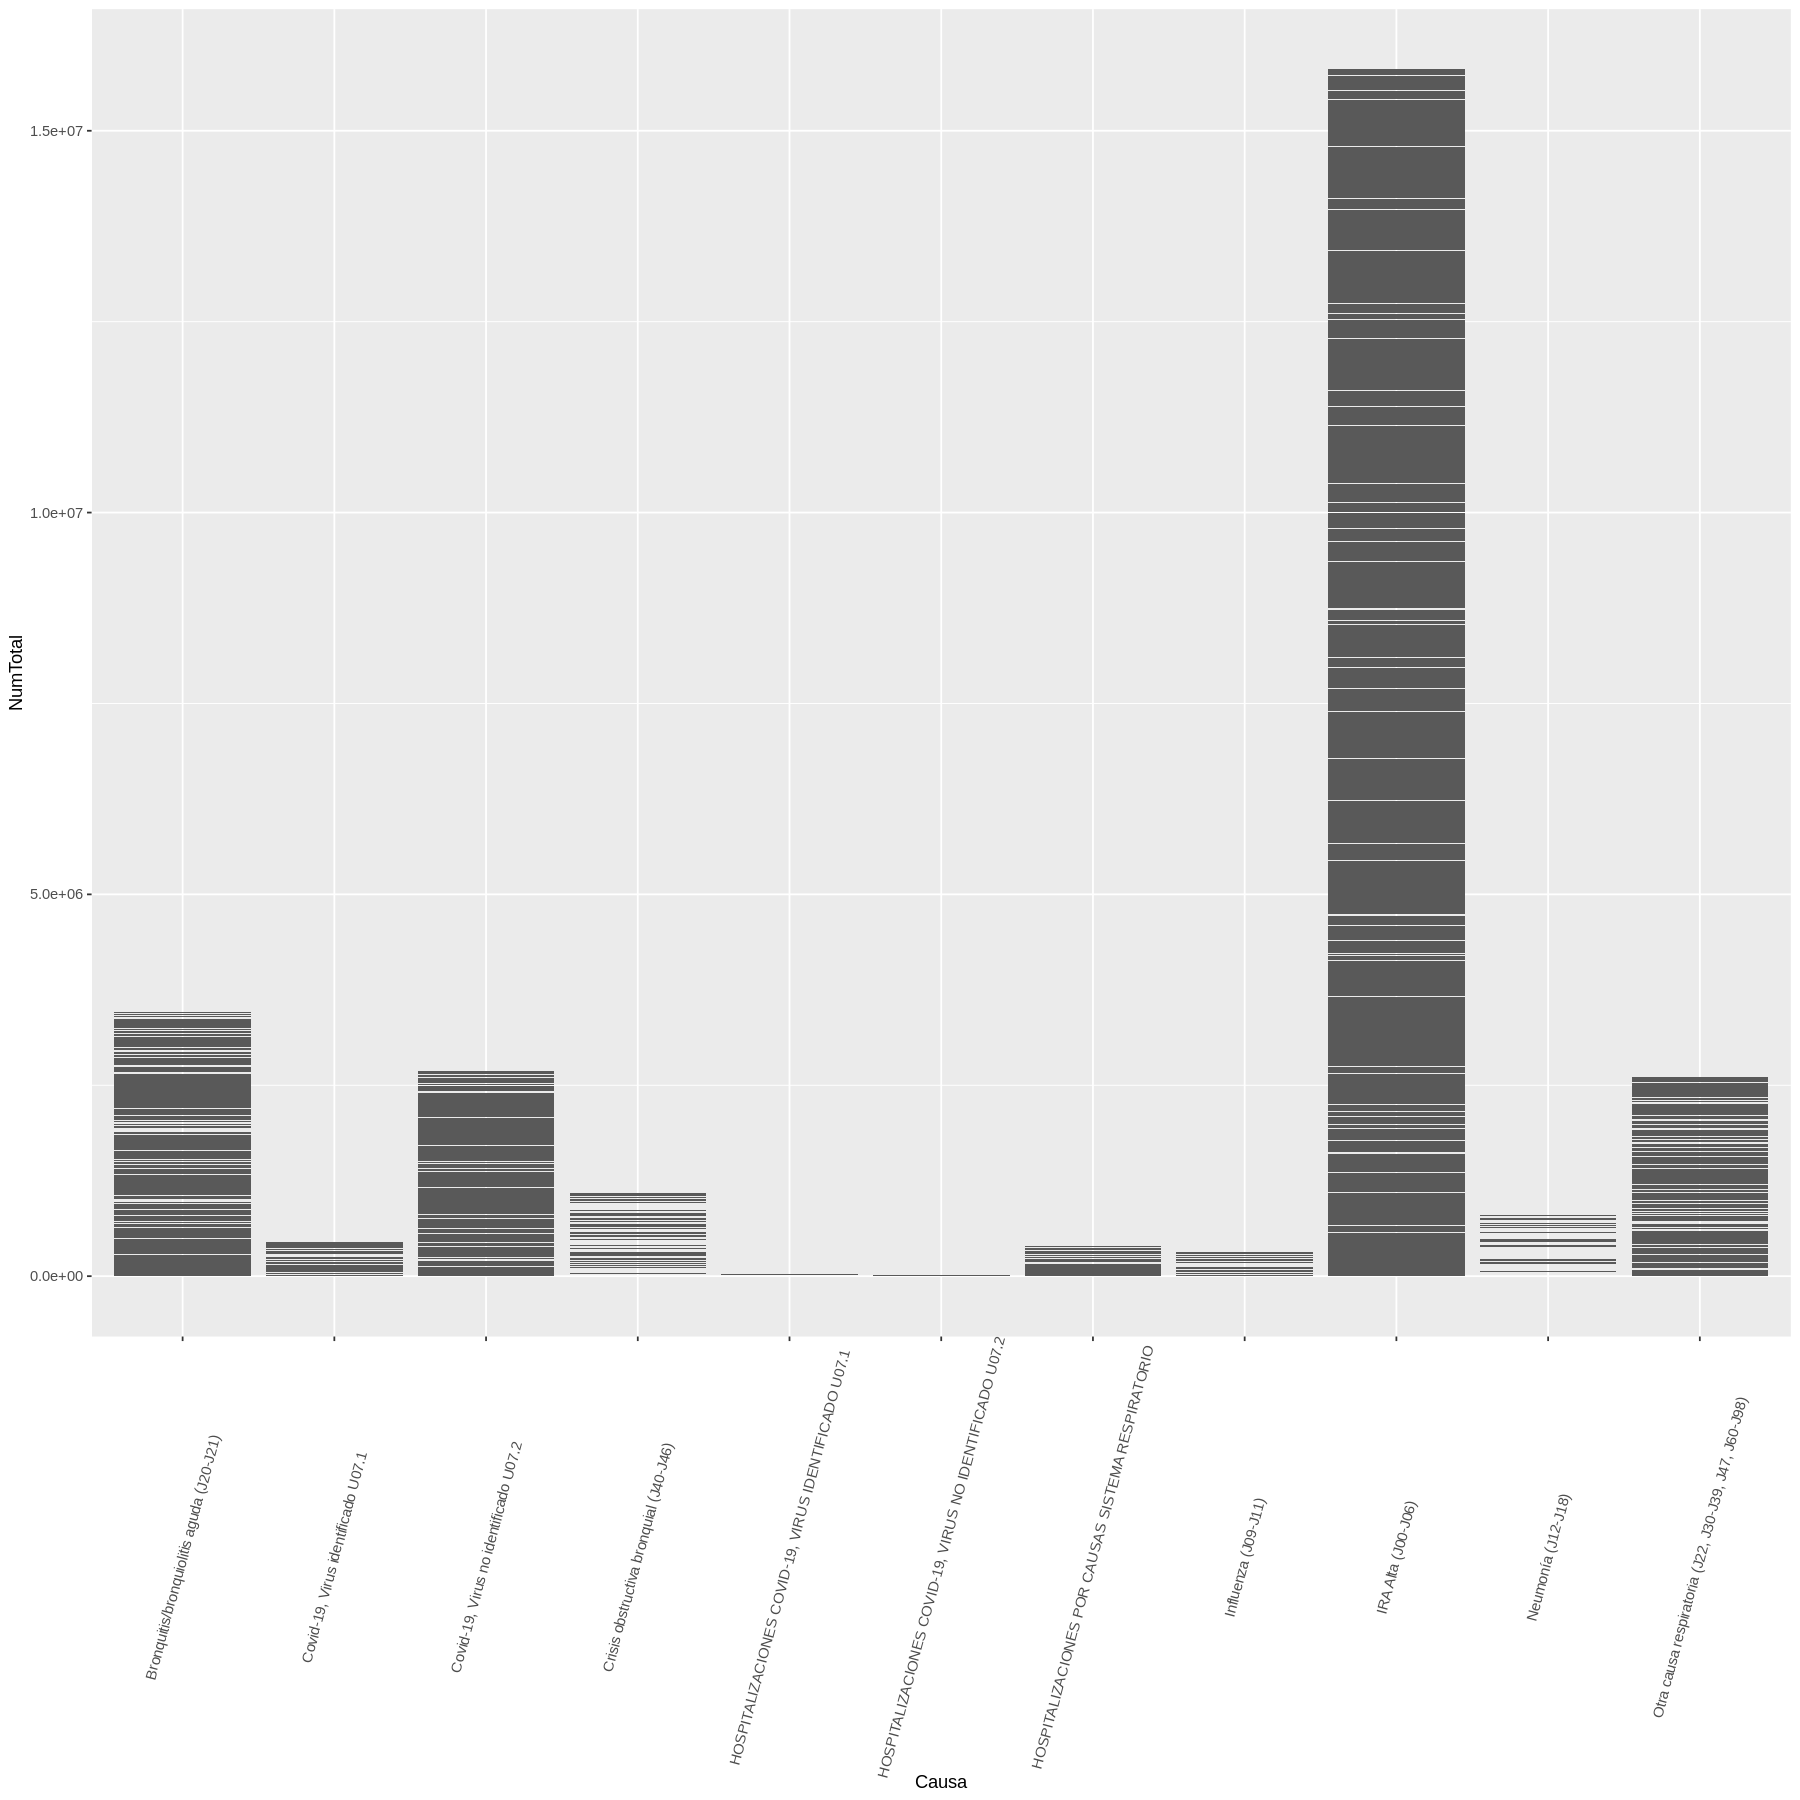

In [69]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(df_urgr_esp_semanal, aes(x=Causa, y= NumTotal)) + geom_bar(stat="identity") +
theme(axis.text.x = element_text(angle = 75, vjust = .5))